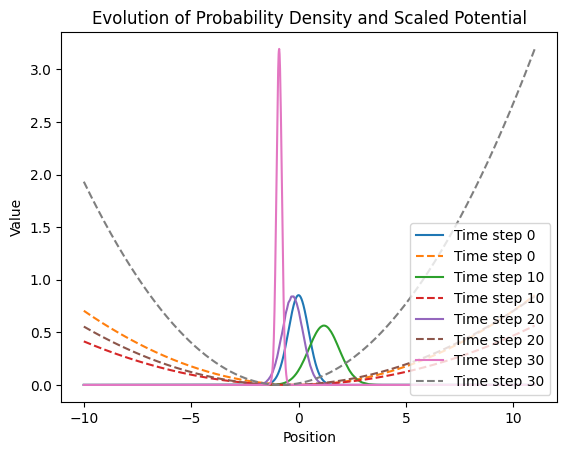

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100000  # Number of spatial grid points
L = 10.0  # Spatial range [-L, L]
dx = 2.0 * L / N
x = np.linspace(-L, L+1-dx, N)
V0 = 1  # Amplitude of potential
omega = 4.9  # Frequency of potential
T = 10.0  # Total simulation time
dt = 0.25  # Time step
m = 1

# Create potential function
def potential(x, t):
    return 0.5 * m * omega ** 2 * (x - np.sin(omega * t)) ** 2

# Create the kinetic energy operator
def kinetic_operator(N, dx):
    kx = np.fft.fftfreq(N, dx) * 2 * np.pi
    return np.exp(-1j * kx ** 2 * dt / 2.0)
    print(kx)


# Create the potential operator
def potential_operator(potential_values):
    return np.exp(-1j * potential_values * dt)

# Initialize wavefunction
psi = np.exp(-(x ** 2) / 2.0) / np.pi ** (1 / 4)
psi /= np.sqrt(np.trapz(np.abs(psi) ** 2, x=x))

# Time evolution using split-operator method
num_steps = int(T / dt)
plot_interval = 10  # Plot every 2 steps

# Create a figure and axis for plotting
plt.figure()

for step in range(num_steps):
    # Calculate potential at current time step
    V = potential(x, step * dt)
    
    # Calculate kinetic operator and apply it in momentum space
    psi = np.fft.fft(psi)
    psi *= kinetic_operator(N, dx)
    psi = np.fft.ifft(psi)
   
    # Calculate potential operator and applying it in position space
    psi *= potential_operator(V)
   
    # Calculate kinetic operator and applying it in momentum space
    psi = np.fft.fft(psi)
    psi *= kinetic_operator(N, dx)
    psi = np.fft.ifft(psi)
    psi /= np.sqrt(np.trapz(np.abs(psi) ** 2, x))
   
    # Plotting the wavefunction and potential at specified intervals
    if step % plot_interval == 0:
        plt.plot(x, np.abs(psi) ** 2, label=f'Time step {step}')
       # plt.plot(x, np.abs(psi) ** 2)
        plt.plot(x, V * max(np.abs(psi) ** 2) / max(V), label=f'Time step {step}', linestyle='dashed')
        #plt.plot(x, V * np.max(np.abs(psi) ** 2) / np.max(V))
        plt.title("Evolution of Probability Density and Scaled Potential")
        plt.xlabel("Position")
        plt.ylabel("Value")
        plt.legend(loc=4)
       # plt.show()
plt.show()


In [7]:
"""import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
hbar = 1.0  # Reduced Planck's constant
m = 1.0     # Particle mass
omega = 1.0 # Angular frequency of the potential
total_time = 10.0  # Total simulation time
num_steps = 1000   # Number of time steps
dt = total_time / num_steps  # Time step

# Initialize position and momentum arrays
r_max = 10.0  # Maximum radius for spherical coordinates
r = np.linspace(0, r_max, 100)  # Radial grid
dr = r[1] - r[0]
theta = np.linspace(0, np.pi, 50)  # Polar angle grid (0 to pi)
dtheta = theta[1] - theta[0]
phi = np.linspace(0, 2 * np.pi, 100)  # Azimuthal angle grid (0 to 2*pi)
dphi = phi[1] - phi[0]

# Create a 3D grid in spherical coordinates
R, Theta, Phi = np.meshgrid(r, theta, phi, indexing='ij')

# Initialize wave function
r0 = 2.0  # Initial radial position
sigma_r = 0.5  # Initial width of the wave packet in r
k0 = 0.0  # Initial angular momentum quantum number (l)
#psi_r = np.exp(-0.5 * ((r - r0) / sigma_r) ** 2) / (np.sqrt(2 * np.pi) * sigma_r ** 1.5)
psi_r = np.exp(-(r ** 2) / 2.0) / np.pi ** (1 / 4)
psi_theta = np.zeros_like(Theta)
psi_phi = np.zeros_like(Phi)

# Define the potential energy function
def potential_energy(r, t):
    return 0.5 * m * omega ** 2 * r ** 2 + (r - np.sin(omega * t)) ** 2

# Time evolution using split-operator method
probability_density_vs_time = []

for t_step in range(num_steps):
    # Kinetic energy operator in momentum space
    exp_kinetic = np.exp(-0.5j * hbar * k0 * (k0 + 1) / (m * r ** 2) * dt)
    
    # Potential energy operator in spherical coordinates
    exp_potential = np.exp(-1j * potential_energy(r, t_step * dt) * dt / hbar)
    
    # Time evolution in radial coordinate
    psi_r *= exp_kinetic
    psi_r = np.fft.fftshift(psi_r)
    psi_r = np.fft.ifft(np.fft.fft(psi_r) * exp_potential)
    psi_r = np.fft.ifftshift(psi_r)
    
    # Calculate probability density at each time step
    probability_density = np.abs(psi_r) ** 2 * r ** 2 * dr * dtheta * dphi
    probability_density_vs_time.append(probability_density)

# Plot probability density vs. position for different time labels
time_labels = [0, 200, 400, 600, 800, 999]

plt.figure(figsize=(12, 8))
for t_step in time_labels:
    plt.plot(r, probability_density_vs_time[t_step], label=f'Time Step {t_step}')
    
plt.title('Probability Density vs. Position (r)')
plt.xlabel('Radius (r)')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()"""


"import numpy as np\nimport matplotlib.pyplot as plt\nfrom mpl_toolkits.mplot3d import Axes3D\n\n# Constants\nhbar = 1.0  # Reduced Planck's constant\nm = 1.0     # Particle mass\nomega = 1.0 # Angular frequency of the potential\ntotal_time = 10.0  # Total simulation time\nnum_steps = 1000   # Number of time steps\ndt = total_time / num_steps  # Time step\n\n# Initialize position and momentum arrays\nr_max = 10.0  # Maximum radius for spherical coordinates\nr = np.linspace(0, r_max, 100)  # Radial grid\ndr = r[1] - r[0]\ntheta = np.linspace(0, np.pi, 50)  # Polar angle grid (0 to pi)\ndtheta = theta[1] - theta[0]\nphi = np.linspace(0, 2 * np.pi, 100)  # Azimuthal angle grid (0 to 2*pi)\ndphi = phi[1] - phi[0]\n\n# Create a 3D grid in spherical coordinates\nR, Theta, Phi = np.meshgrid(r, theta, phi, indexing='ij')\n\n# Initialize wave function\nr0 = 2.0  # Initial radial position\nsigma_r = 0.5  # Initial width of the wave packet in r\nk0 = 0.0  # Initial angular momentum quantum number

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
hbar=1.0
m=1.0
omega=1.0
total_time= 10.0
num_steps=1000
dt= total_time/num_steps


In [ ]:
r_max=10.0
r=np.linspace(0,r_max,100)
dr=r[1]-r[0]
theta=np.linspace(0,np.pi,50)
dtheta=theta[1]-theta[0]
phi = np.linspace(0, 2 * np.pi, 100)
dphi = phi[1] - phi[0]






In [6]:
R,Theta,Phi=np.meshgrid(r,theta,phi, indexing='ij')


In [ ]:
psi_r = np.exp(-(r ** 2) / 2.0) / np.pi ** (1 / 4)
psi_theta = np.zeros_like(Theta)
psi_phi = np.zeros_like(Phi)


In [ ]:
def potential_energy(r,t):
    return 0.5*m*omega**2*(r*np.sin(theta)*np.cos(phi)-np.sin(omega*t))**2

In [ ]:
def kinetic_operator(k)
    return np.exp(-k**2/2*m)